### Implementation of ordinary least square linear regression
- Linear regressoin and error calculation are developed from scratch
- The model is used to find relationship between head size and brain weight from Kaggel
- Accuray is measured in terms of root mean squared error and R^2

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
# read dataset as Pandas Dataframe
df = pd.read_csv('headbrain.csv')
print(df.shape)

(237, 4)


In [5]:
# see top 5 rows of data
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
# define independant(x) and dependant(y)variables
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [8]:
# calculate mean of variables
x_mean = np.mean(x)
y_mean = np.mean(y)

In [9]:
# total number of value
n = len(x)

In [27]:
# calculating b0 and b1 for regression
numerator = 0
denominator = 0
for i in range(n):
    numerator += (x[i]-x_mean) * (y[i]-y_mean)
    denominator += (x[i]-x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

# print coefficients
print('Coefficient b1 and b0 are {} and {}, respectively.'.format(np.round(b1, decimals=2), np.round(b0, decimals=2)))

# Brain weights =  b1 * Head size + b0

Coefficient b1 and b0 are 0.26 and 325.57, respectively.


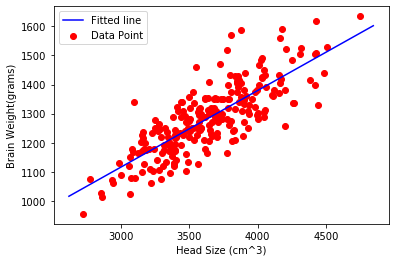

In [24]:
# plot instances and overlay the fitted line
plt.scatter(x,y, color='r', label='Data Point')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight(grams)')

# plot line
x_max = np.max(x) + 100
x_min = np.min(x) - 100
xx = np.linspace(x_min, x_max, 1000)
yy = b1 * xx + b0

plt.plot(xx, yy, color='b', label='Fitted line')

plt.legend()

In [28]:
# error calculation - root mean squared error
rmse = 0
for i in range(n):
    y_pred = b1 * x[i] + b0
    rmse += (y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print('Root mean squared error is {}.'.format(np.round(rmse, decimals=2)))

Root mean squared error is 72.12.


In [34]:
# error calculation - R^2
sum_of_squares = 0
sum_of_residuals = 0
for i in range(n):
    y_pred = b1*x[i] + b0
    sum_of_squares += (y[i] - y_mean) ** 2
    (sum_of_residuals) += (y[i] - y_pred) ** 2
    
r2_score = 1 - (sum_of_residuals / sum_of_squares)
print('Goodness of fit (R\u00b2) score is {}.'.format(np.round(r2_score, decimals=2)))

Goodness of fit (R²) score is 0.64.
